Nombre de los participantes Proyecto
Juan José Naranjo Velásquez CC : 1039474689
Alejandro Mora Suarez CC: 1128437044
Kenneth David Leonel Triana CC: 1192817456

[Problemática](https://www.elcolombiano.com/medellin/con-tos-y-gripa-viven-en-las-zonas-con-la-peor-calidad-del-aire-del-aburra-KB25241931)

La calidad del aire en Medellín juega un papel importante para adultos mayores, niños menores de 5 años, mujeres embarazadas y gente con afecciones cardiorrespiratorias, dado que una mala calidad del aire influye con afecciones respiratorias, cardiacas, de la piel y hasta con la aparición de cáncer.

Dentro de las métricas que acompaña la calidad del aire, el número de 2.5 micras es de gran relevancia dado que se toma como patrón para medir las partículas con un tamaño minúsculo y penetran más fácil en órganos como los pulmones.


**Objetivo proyecto**: Determinar la incidencia de las variables metereológicas sobre la métrica pm2.5 para la calidad del aire.

In [76]:
#Instalar librerias

#%pip install pandas numpy ydata-profiling ipywidgets numba

In [77]:
# importar librerias
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
from scipy import stats
import holidays
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import joblib

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


Obtener los datos y dejarlos en dataframes

In [78]:
#Extraer datos de calidad del aire en las estaciones  # 69 Caldas, 86 Aranjuez, 28 Itagui
def get_data (url):
    """
    Función utilizada para la obtención de datos en tipo DataFrame según las bases de datos del repositorio

    In[0]: url del dataset en el repositorio
    Out[0]: DataFrame con los datos extraídos
    """
    return pd.read_csv(url)

# Datos de la calidad del aire tomados desde red SIATA de monitoreo de calidad del aire en Valle de Aburra
cal_aire_ita = '28_itagui/estacion_data_calidadaire_28_20240301_20240331.csv'
cal_aire_cal = '69_Caldas/estacion_data_calidadaire_69_20240301_20240331.csv'
cal_aire_ara = '86_Aranjuez/estacion_data_calidadaire_86_20240301_20240331.csv'
cal_aire_bel =  '83_Belen/estacion_data_calidadaire_83_20240101_20240131.csv'


cal_aire_ita = get_data(cal_aire_ita)
cal_aire_cal = get_data(cal_aire_cal)
cal_aire_ara = get_data(cal_aire_ara)
cal_aire_bel = get_data(cal_aire_bel)

# Datos de temperatura,presion,humedad,precipitacion y vientos estacion itagui 28
temp_ita='28_itagui/Temperatura/estacion_data_temperatura_252__20240201_20240229.csv'
humedad_ita='28_itagui/humedad/estacion_data_humedad_252__20240201_20240229.csv'
presion_ita='28_itagui/presion/estacion_data_presion_252__20240201_20240229.csv'
precipitacion_ita='69_Caldas/precipitacion/estacion_data_precipitacion_105__20240201_20240229.csv'
vientos_ita='28_itagui/vientos/estacion_data_vientos_252__20240201_20240229.csv'

temp_ita=get_data(temp_ita)
humedad_ita=get_data(humedad_ita)
presion_ita=get_data(presion_ita)
precipitacion_ita=get_data(precipitacion_ita)
vientos_ita=get_data(vientos_ita)


# Datos de temperatura,presion,humedad,precipitacion y vientos estacion Caldas 69
temp_cal='69_Caldas/Temperatura/estacion_data_temperatura_105__20240201_20240229.csv'
humedad_cal='69_Caldas/humedad/estacion_data_humedad_105__20240201_20240229.csv'
precipitacion_cal='69_Caldas/precipitacion/estacion_data_precipitacion_105__20240201_20240229.csv'
presion_cal='69_Caldas/presion/estacion_data_presion_105__20240201_20240229.csv'
vientos_cal='69_Caldas/vientos/estacion_data_vientos_105__20240201_20240229.csv'

temp_cal=get_data(temp_cal)
humedad_cal=get_data(humedad_cal)
precipitacion_cal=get_data(precipitacion_cal)
presion_cal=get_data(presion_cal)
vientos_cal=get_data(vientos_cal)


# Datos de temperatura,presion,humedad,precipitacion y vientos estacion aranjuez 86
temp_aranj='86_Aranjuez/temperatura/estacion_data_temperatura_68__20240201_20240229.csv'
humedad_aranj='86_Aranjuez/humedad/estacion_data_humedad_68__20240201_20240229.csv'
precipitacion_aranj='86_Aranjuez/precipitacion/estacion_data_precipitacion_68__20240201_20240229.csv'
presion_aranj='86_Aranjuez/presion/estacion_data_presion_68__20240201_20240229.csv'
vientos_aranj='86_Aranjuez/vientos/estacion_data_vientos_68__20240201_20240229.csv'

temp_aranj=get_data(temp_aranj)
humedad_aranj=get_data(humedad_aranj)
precipitacion_aranj=get_data(precipitacion_aranj)
presion_aranj=get_data(presion_aranj)
vientos_aranj=get_data(vientos_aranj)


# Datos de temperatura,presion,humedad,precipitacion y vientos estación 83 Belén
temp_bel='83_Belen/Temperatura/estacion_data_temperatura_198__20240101_20240131.csv'
humedad_bel='83_Belen/humedad/estacion_data_humedad_198__20240101_20240131.csv'
presion_bel='83_Belen/presion/estacion_data_presion_198__20240101_20240131.csv'
precipitacion_bel='83_Belen/precipitacion/estacion_data_precipitacion_9__20240101_20240131.csv'
vientos_bel = '83_Belen/vientos/estacion_data_vientos_198__20240101_20240131.csv'

temp_bel=get_data(temp_bel)
humedad_bel=get_data(humedad_bel)
precipitacion_bel=get_data(precipitacion_bel)
presion_bel=get_data(presion_bel)
vientos_bel=get_data(vientos_bel)


# nombres de caracteristicas en minusculas calidad aire
cal_aire_ita.columns = cal_aire_ita.columns.str.lower()
cal_aire_cal.columns = cal_aire_cal.columns.str.lower()
cal_aire_ara.columns = cal_aire_ara.columns.str.lower()
cal_aire_bel.columns = cal_aire_bel.columns.str.lower()
#nombres de caracteristicas en minusculas Itagui
temp_ita.columns = temp_ita.columns.str.lower()
humedad_ita.columns = humedad_ita.columns.str.lower()
presion_ita.columns = presion_ita.columns.str.lower()
vientos_ita.columns = vientos_ita.columns.str.lower()
precipitacion_ita.columns = precipitacion_ita.columns.str.lower()

#nombres de caracteristicas en minusculas Aranjuez
temp_aranj.columns = temp_aranj.columns.str.lower()
humedad_aranj.columns = humedad_aranj.columns.str.lower()
precipitacion_aranj.columns = precipitacion_aranj.columns.str.lower()
presion_aranj.columns = presion_aranj.columns.str.lower()
vientos_aranj.columns = vientos_aranj.columns.str.lower()

#nombres de caracteristicas en minusculas Caldas
temp_cal.columns = temp_cal.columns.str.lower()
humedad_cal.columns = humedad_cal.columns.str.lower()
precipitacion_cal.columns = precipitacion_cal.columns.str.lower()
presion_cal.columns = presion_cal.columns.str.lower()
vientos_cal.columns = vientos_cal.columns.str.lower()


#nombres de caracteristicas en minusculas Belen
temp_bel.columns = temp_bel.columns.str.lower()
humedad_bel.columns = humedad_bel.columns.str.lower()
precipitacion_bel.columns = precipitacion_bel.columns.str.lower()
presion_bel.columns = presion_bel.columns.str.lower()
vientos_bel.columns = vientos_bel.columns.str.lower()

### Eliminación de la columnas de calidad ya que no influye

Puesto que los datos extraidos de la red SIATA presenta semejanza en el nombre de la columna "Calidad" se procede a eliminar esas columnas

In [79]:
def eliminarColumnas(data, nombresColumnas):
    """
    Función para eliminar columnas en un dataframe
    """
    # Eliminar columnas que no sean necesarias
    data = data.drop(columns=nombresColumnas)
    return data

#-----------------------------------------------------------------
# Eliminar columna calidad de los diferentes dataframes de Itagui
columnasAEliminar = ['calidad_pm25','calidad_pm10','calidad_pm1','calidad_no','calidad_p_ssr',
                     'calidad_pliquida_ssr','calidad_rglobal_ssr','calidad_taire10_ssr',
                     'calidad_vviento_ssr','calidad_no2','calidad_nox','calidad_pst','calidad_dviento_ssr',
                     'calidad_haire10_ssr','calidad_ozono','calidad_so2','calidad_co']


# cal_aire_ita = eliminarColumnas(cal_aire_ita,columnasAEliminar)
# temp_ita = eliminarColumnas(temp_ita,'calidad')
# humedad_ita = eliminarColumnas(humedad_ita,'calidad')
# presion_ita = eliminarColumnas(presion_ita,'calidad')
# vientos_ita = eliminarColumnas(vientos_ita,'calidad')
# precipitacion_ita = eliminarColumnas(precipitacion_ita,'calidad')

# Eliminar columna calidad de los diferentes dataframes de Caldas
cal_aire_cal = eliminarColumnas(cal_aire_cal, columnasAEliminar)
temp_cal = eliminarColumnas(temp_cal,'calidad')
humedad_cal = eliminarColumnas(humedad_cal,'calidad')
precipitacion_cal = eliminarColumnas(precipitacion_cal,'calidad')
presion_cal = eliminarColumnas(presion_cal,'calidad')
vientos_cal = eliminarColumnas(vientos_cal,'calidad')

# Eliminar columna calidad de los diferentes dataframes de Aranjuez
cal_aire_ara = eliminarColumnas(cal_aire_ara ,columnasAEliminar)
temp_aranj = eliminarColumnas(temp_aranj,'calidad')
humedad_aranj = eliminarColumnas(humedad_aranj,'calidad')
precipitacion_aranj = eliminarColumnas(precipitacion_aranj,'calidad')
presion_aranj = eliminarColumnas(presion_aranj,'calidad')
vientos_aranj = eliminarColumnas(vientos_aranj,'calidad')

# Eliminar columna calidad de los diferentes dataframes de Belen
cal_aire_bel = eliminarColumnas(cal_aire_bel ,columnasAEliminar)
temp_bel = eliminarColumnas(temp_bel,'calidad')
humedad_bel = eliminarColumnas(humedad_bel,'calidad')
precipitacion_bel = eliminarColumnas(precipitacion_bel,'calidad')
presion_bel = eliminarColumnas(presion_bel,'calidad')
vientos_bel = eliminarColumnas(vientos_bel,'calidad')



Se muestra uno de los dataframes ya sin las columnas de calidad

In [80]:
# Dataframe de la calidad del aire estación Itagui sin columnas Calidad
cal_aire_cal.head(3)



,fecha_hora,codigoserial,pm25,pm10,pm1,no,no2,nox,ozono,co,so2,pst,dviento_ssr,haire10_ssr,p_ssr,pliquida_ssr,rglobal_ssr,taire10_ssr,vviento_ssr
0,2024-01-01 00:00:00,69,36.4093,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,2024-01-01 01:00:00,69,68.4104,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2024-01-01 02:00:00,69,64.5992,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


Eliminación registros donde nuestra variable pm25 tenga valores -9999.0 que esto significa dato nulo
o que sean valores menores que 0

In [81]:
def eliminarRegistrosNulos(data,columna, valor):
    """
    Función para eliminar los valores nulos en una columna 
    estos son valores -999.0
    """
    # Nos quedamos con los valores que sean mayores a 0
    data = data[data[columna] > valor].reset_index(drop=True)
    return data

In [82]:
#Se considero que para la variable pm25 se eliminaban ya que no deberia existir valores menores a 0 de esta variable
cal_aire_cal = eliminarRegistrosNulos(cal_aire_cal,'pm25', 0) # valores menor que 0
cal_aire_ara = eliminarRegistrosNulos(cal_aire_ara,'pm25', 0)
cal_aire_bel = eliminarRegistrosNulos(cal_aire_bel,'pm25', 0)


In [83]:
#Corroboramos que ya nuestra columna pm25 que es la que necesitabamos cerciorarnos que no tuviera datos nulos
cal_aire_cal['pm25'].min()

np.float64(0.5)

### Eliminar registros nulos de las variables metereologicas


Se realiza la muestra del proceso en la variable Presión

In [84]:
presion_cal[presion_cal['presion'] == -999.0].count()

fecha_hora    60337
presion       60337
dtype: int64

Función para convertir nuestro valores -999.0 o -9999.0 a nulos ya que estos no fueron tomados por los sensores del SIATA

In [85]:
#Función apra pasar esos valores -999.0 o -9999.0 a NaN
def pasarDatosANulos(data,valor):
    """
    Función para pasar datos a valores nulos en un dataframe
    """
    # Reemplazamos los valores -999.0  u otro con NaN
    data = data.replace(valor, np.nan)
    return data

Remplazar valores -999.0 o -9999.0 a nulos (NaN)

In [86]:
#Presion de las estaciones
presion_cal = pasarDatosANulos(presion_cal,-999.0)
presion_aranj = pasarDatosANulos(presion_aranj, -999.0)
presion_bel = pasarDatosANulos(presion_bel, -999.0)

#Temperatura de las estaciones
temp_cal = pasarDatosANulos(temp_cal,-999.0)
temp_aranj = pasarDatosANulos(temp_aranj, -999.0)
temp_bel = pasarDatosANulos(temp_bel, -999.0)

#Humedad de las estaciones
humedad_cal = pasarDatosANulos(humedad_cal,-999.0)
humedad_aranj = pasarDatosANulos(humedad_aranj, -999.0)
humedad_bel= pasarDatosANulos(humedad_bel, -999.0)

# Precipitación de las estaciones
precipitacion_cal = pasarDatosANulos(precipitacion_cal,-999.0)
precipitacion_aranj = pasarDatosANulos(precipitacion_aranj, -999.0)
precipitacion_bel = pasarDatosANulos(precipitacion_bel, -999.0)

# Viento de las estaciones
vientos_cal = pasarDatosANulos(vientos_cal,-999.0)
vientos_aranj = pasarDatosANulos(vientos_aranj, -999.0)
vientos_bel = pasarDatosANulos(vientos_bel, -999.0)

In [87]:
print(f"Cantidad de registros en mi dataframe Presion Caldas con los nulos : {len(presion_cal)}")

Cantidad de registros en mi dataframe Presion Caldas con los nulos : 394560


In [88]:
##-------Eliminación registros dataframe Presion de las estaciones ---------
presion_cal = presion_cal.dropna()
presion_aranj = presion_aranj.dropna()
presion_bel = presion_bel.dropna()

##-------Eliminación registros dataframe Temperatura de las estaciones ---------
temp_cal = temp_cal.dropna()
temp_aranj = temp_aranj.dropna()
temp_bel = temp_bel.dropna()

##-------Eliminación registros dataframe Humedad de las estaciones ---------
humedad_cal = humedad_cal.dropna()
humedad_aranj = humedad_aranj.dropna()
humedad_bel = humedad_bel.dropna()

##-------Eliminación registros dataframe Preciptacion de las estaciones ---------
precipitacion_cal = precipitacion_cal.dropna()
precipitacion_aranj = precipitacion_aranj.dropna()
precipitacion_bel = precipitacion_bel.dropna()

##-------Eliminación registros dataframe Viento de las estaciones ---------
vientos_cal = vientos_cal.dropna()
vientos_aranj = vientos_aranj.dropna()
vientos_bel = vientos_bel.dropna()


#Se corrobora que se hayan eliminado los nulos.
print(f"Revisión de nulos en Presion Caldas \n{presion_cal.isnull().sum()}")
print(f"Revisión de cantidad registros en Presion Caldas con la eliminación nulos:{len(presion_cal)}")



Revisión de nulos en Presion Caldas 
fecha_hora    0
presion       0
dtype: int64
Revisión de cantidad registros en Presion Caldas con la eliminación nulos:334223


### Imputación de los datos metereologicos

In [89]:
#Esta es la imputación para que cada uno de las columnas de nuestros datos metereologicas tengan mayor congruencia 
# por el método knn-imputer
def inputacionDatos(data,columna):

    # Construimos el modelo con 15 vecinos y el peso es uniform
    imputer = KNNImputer(n_neighbors=15, weights="uniform")

    # Ajustamos el modelo e imputamos los missing values
    imputer.fit(data[[columna]])
    data[columna] = imputer.transform(data[[columna]]).ravel()
    # Se rectifica que esos datos NaN ya no existan para rectificar la imputación
    print("Valores perdidos en normalized-losses: " + 
        str(data[columna].isnull().sum()))
    return data

### Proceso Imputación 


#### Proceso comentado por temas de tiempo de ejecución



Dejamos el codigo de abajo comentado por temas que la inputación se demora mucho, para eso guardamos la inputación en archivos csv

In [90]:
##-------Presion imputación en las estaciones ---------

# presion_cal = inputacionDatos(presion_cal,'presion')
# presion_aranj = inputacionDatos(presion_aranj,'presion')

##-------Temperatura imputación en las estaciones ---------

#temp_cal = inputacionDatos(temp_cal,'temperatura')
#temp_aranj = inputacionDatos(temp_aranj,'temperatura')

# humedad_aranj = eliminarColumnas(humedad_aranj,'calidad')
# precipitacion_aranj = eliminarColumnas(precipitacion_aranj,'calidad')
# vientos_aranj = eliminarColumnas(vientos_aranj,'calidad')

##-------Humedad imputación en las estaciones ---------
#humedad_cal = inputacionDatos(humedad_cal,'humedad')
#humedad_aranj = inputacionDatos(humedad_aranj,'humedad')

##-------precipitaciones imputación en las estaciones ---------

# precipitacion_cal = inputacionDatos(precipitacion_cal,'p1')
#precipitacion_aranj = inputacionDatos(precipitacion_aranj,'p1')


##-------Vientos imputación en las estaciones ---------

# vientos_cal = inputacionDatos(vientos_cal,'velocidad_prom')
# vientos_cal = inputacionDatos(vientos_cal,'velocidad_max')
# vientos_cal = inputacionDatos(vientos_cal,'direccion_prom')
# vientos_cal = inputacionDatos(vientos_cal,'direccion_max')

# vientos_aranj = inputacionDatos(vientos_aranj,'velocidad_prom')
# vientos_aranj = inputacionDatos(vientos_aranj,'velocidad_max')
# vientos_aranj = inputacionDatos(vientos_aranj,'direccion_prom')
# vientos_aranj = inputacionDatos(vientos_aranj,'direccion_max')



Se guarda esas imputaciones en archivos csv

In [91]:
## Guardar en csv la inputación
#Presion 
# presion_cal.to_csv('data/stage/presion_cal.csv', index=False)
# presion_aranj.to_csv('data/stage/presion_aranj.csv', index=False)

#Temperatura
#temp_cal.to_csv('data/stage/temp_cal.csv', index=False)
#temp_aranj.to_csv('data/stage/temp_aranj.csv', index=False)

#Humedad
#humedad_cal.to_csv('data/stage/humedad_cal.csv', index=False)
#humedad_aranj.to_csv('data/stage/humedad_aranj.csv', index=False)

#Precipitaciones
#precipitacion_cal.to_csv('data/stage/precipitacion_cal.csv', index=False)
#precipitacion_aranj.to_csv('data/stage/precipitacion_aranj.csv', index=False)

#Vientos

#vientos_cal.to_csv('data/stage/vientos_cal.csv', index=False)
#vientos_aranj.to_csv('data/stage/vientos_aranj.csv', index=False)


### Se importan archivos de la imputación

In [92]:
#Se importa la inputacion

#Presion de las estaciones
presion_cal_inputado = pd.read_csv('data/stage/presion_cal.csv')
presion_aranj_inputado = pd.read_csv('data/stage/presion_aranj.csv')

#Temperatura de las estaciones

temp_cal_inputado = pd.read_csv('data/stage/temp_cal.csv')
temp_aranj_inputado = pd.read_csv('data/stage/temp_aranj.csv')

#Humedad de las estaciones

humedad_cal_inputado = pd.read_csv('data/stage/humedad_cal.csv')
humedad_aranj_inputado = pd.read_csv('data/stage/humedad_aranj.csv')

# Precipitación de las estaciones

precipitacion_cal_inputado = pd.read_csv('data/stage/precipitacion_cal.csv')
precipitacion_aranj_inputado = pd.read_csv('data/stage/precipitacion_aranj.csv')

# Viento de las estaciones

vientos_cal_inputado = pd.read_csv('data/stage/vientos_cal.csv')
vientos_aranj_inputado = pd.read_csv('data/stage/vientos_aranj.csv')

#Comprobamos que los valores nulos esten sustituidos

presion_cal_inputado.isnull().sum()

fecha_hora    0
presion       0
dtype: int64

Comparar la imputación con proceso sin imputar

In [93]:
# Revisar si cambio tamaño del dataframe
print (f"El tamaño del archivo de presión con proceso de imputacion es de: {len(presion_cal_inputado)}")
print (f"El tamaño del archivo de presión sin proceso de imputacion pero de eliminación nulos: {len(presion_cal)}")
print (f"El valor maximo de la presión imputado es de: {presion_cal_inputado['presion'].max()}")
print (f"El valor minimo de la presión imputado es de: {presion_cal_inputado['presion'].min()}")
print (f"El valor maximo de la presión sin nulos es de: {presion_cal['presion'].max()}")
print (f"El valor minimo de la presión sin nulos es de: {presion_cal['presion'].min()}")

El tamaño del archivo de presión con proceso de imputacion es de: 394560
El tamaño del archivo de presión sin proceso de imputacion pero de eliminación nulos: 334223
El valor maximo de la presión imputado es de: 829.9
El valor minimo de la presión imputado es de: 821.0
El valor maximo de la presión sin nulos es de: 829.9
El valor minimo de la presión sin nulos es de: 821.0


### Evaluar variables de calidad del aire

In [94]:
# se mira los calores maximos de cada columna de los dataframes
print(f"Ver valores maximo por todas las variables de nuestro dataset :\n{cal_aire_cal.max()}\n")
print(f"Ver valores minimos por todas las variables de nuestro dataset :\n{cal_aire_cal.min()}")

Ver valores maximo por todas las variables de nuestro dataset :
fecha_hora      2024-09-30 23:00:00
codigoserial                     69
pm25                     99999000.0
pm10                        -9999.0
pm1                         -9999.0
no                          -9999.0
no2                         -9999.0
nox                         -9999.0
ozono                       -9999.0
co                          -9999.0
so2                         -9999.0
pst                         -9999.0
dviento_ssr                 -9999.0
haire10_ssr                 -9999.0
p_ssr                       -9999.0
pliquida_ssr                -9999.0
rglobal_ssr                 -9999.0
taire10_ssr                 -9999.0
vviento_ssr                 -9999.0
dtype: object

Ver valores minimos por todas las variables de nuestro dataset :
fecha_hora      2024-01-01 00:00:00
codigoserial                     69
pm25                            0.5
pm10                        -9999.0
pm1                         

Filtrar el dataframe calidad aire para tomar las columnas objetivo ya que observamos que los datos del SIATA solo toma los valores de la particula pm25

In [95]:
def filtro_data_peque(data):
    """"
    Función para tomar columnas de estudio en archivos de calidad del aire en las diferentes estaciones

    In[0]: dataset
    Out[0]: dataset filtrado hasta columna de estudio
    """
    # Filtrar los datos segun el indice
    tamColumnas = data.shape
    if (tamColumnas[1]>6):
        datosFiltrados = data.iloc[:,:3]
    return datosFiltrados

def filtro_data(data,nombreColumna,condicion):
    """"
    Función para tomar calidad de datos en tiempo real establecidos desde datos crudos

    In[0]: dataset, 'calidad_pm25', 1
    Out[0]: dataset filtrado con datos en calidad
    """
    # Filtrar los datos segun el indice y la condicion
    tamColumnas = data.shape
    if (tamColumnas[1]>6):
        datosFiltrados = data.iloc[:,:4]
        return datosFiltrados[datosFiltrados.loc[:, nombreColumna] == condicion]
    else:
       return data.loc[data.loc[:, nombreColumna] == condicion]

# #Se tiene el filtrado estación Itagui
# dataCalidadFiltradaItagui = filtro_data_peque(cal_aire_ita)

#Se tiene el filtrado estación Caldas
dataCalidadFiltradaCaldas = filtro_data_peque(cal_aire_cal)

#Se tiene el filtrado estación Aranjuez
dataCalidadFiltradaAranjuez = filtro_data_peque(cal_aire_ara)

#Se tiene el filtrado estación Belen
dataCalidadFiltradaBelen= filtro_data_peque(cal_aire_bel)

#Visualizar datos calidad aire itagui
dataCalidadFiltradaCaldas.head(3)

,fecha_hora,codigoserial,pm25
0,2024-01-01 00:00:00,69,36.4093
1,2024-01-01 01:00:00,69,68.4104
2,2024-01-01 02:00:00,69,64.5992


Dado que los registros que se tienen por las características metereológicas se encuentran por minuto, debemos llevarlos a la estructura o base del dataset que almacena la calidad del aire bajo registros por dia, por ende, se realiza el promedio de los dataframes (Temperatura , precipitación, Vientos, Humedad, Presion) de las diferentes estaciones para homogeneizar la base final

In [96]:

def agregarColumnas(data):
    """"
    Función para agregar columnas
    In[0]: dataset
    Out[0]: dataset con columnas día , mes
    """
    dataTemporal = data.copy()
    dataTemporal['anio'] = pd.to_datetime(dataTemporal['fecha_hora']).dt.year
    dataTemporal['dia']= pd.to_datetime(dataTemporal['fecha_hora']).dt.day
    dataTemporal['mes']= pd.to_datetime(dataTemporal['fecha_hora']).dt.month
    return dataTemporal



def sacarPromedio(data,nombreColumna,revision):
    """"
    Función para calcular el promedio de todas las columnas de un dataframe

    args:   data =  dataframe a utilizar
            nombrecolumna = característica a la cual se le realiza el promedio
            revision = indicador de revision (1,2,3) según las columnas de los dataframes
            1 si el dataframe contiene únicamente para nombre de columna y calidad
            2 si el dataframe contiene las columnas nombre de columna, calidad y codigo serial
            3 si el dataframe contiene las columnas nombre de columna, calidad y se aplican las demas características en este caso del viento

    In[0]: dataset
    Out[0]: promedio de cada columna
    """
    #Llamamos a la funcion agregarColumnas
    dataNuevo = agregarColumnas(data)
    #return dataNuevo
    #se saca el promedio de temperatura de la columna Temperatura

    if (revision ==1):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'{nombreColumna}':'median'
        }).reset_index()
        return registroPromedio
    elif(revision ==2):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'{nombreColumna}':'median',
            'codigoserial': lambda x: stats.mode(x)[0]
        }).reset_index()
        return registroPromedio
    elif(revision == 3):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'{nombreColumna}':'median',
            'velocidad_max':'median',
            'direccion_prom':'median',
            'direccion_max':'median'
        }).reset_index()
        return registroPromedio


In [97]:
# #Sacar promedio Itagui
# temperaturaItaguiPromedio = sacarPromedio(temp_ita, 'temperatura',1)
# humedadItaguiPromedio = sacarPromedio(humedad_ita, 'humedad',1)
# presionItaguiPromedio = sacarPromedio(presion_ita, 'presion',1)
# precipitacionItaguiPromedio = sacarPromedio(precipitacion_ita, 'p1',1)
# vientosItaguiPromedio = sacarPromedio(vientos_ita,'velocidad_prom',3)

#Sacar promedio Caldas
temperaturaCaldasPromedio = sacarPromedio(temp_cal, 'temperatura', 1)
humedadCaldasPromedio = sacarPromedio(humedad_cal,'humedad',1)
precipitacionCaldasPromedio = sacarPromedio(precipitacion_cal, 'p1',1)
presionCaldasPromedio = sacarPromedio(presion_cal, 'presion',1)
vientosCaldasPromedio = sacarPromedio(vientos_cal,'velocidad_prom',3)

#Sacar promedio Aranjuez
temperaturaAranjuezPromedio = sacarPromedio(temp_aranj, 'temperatura', 1)
humedadAranjuezPromedio = sacarPromedio(humedad_aranj,'humedad',1)
precipitacionAranjuezPromedio = sacarPromedio(precipitacion_aranj, 'p1',1)
presionAranjuezPromedio = sacarPromedio(presion_aranj, 'presion',1)
vientosAranjuezPromedio = sacarPromedio(vientos_aranj,'velocidad_prom',3)

#Sacar promedio Belen
temperaturaBelenPromedio = sacarPromedio(temp_bel, 'temperatura', 1)
humedadBelenPromedio = sacarPromedio(humedad_bel,'humedad',1)
precipitacionBelenPromedio = sacarPromedio(precipitacion_bel, 'p1',1)
presionBelenPromedio = sacarPromedio(presion_bel, 'presion',1)
vientosBelenPromedio = sacarPromedio(vientos_bel,'velocidad_prom',3)


Al dataframe dataCalidadFiltrada se necesita sacar el promedio por dia para después concatanar las demas variables con el dataframe

In [98]:
# calidadAireItagui = sacarPromedio(dataCalidadFiltradaItagui, 'pm25',2)
calidadAireCaldas = sacarPromedio(dataCalidadFiltradaCaldas, 'pm25', 2)
calidadAireAranjuez = sacarPromedio(dataCalidadFiltradaAranjuez, 'pm25', 2)
calidadAireBelen = sacarPromedio(dataCalidadFiltradaBelen, 'pm25', 2)
calidadAireCaldas.iloc[:3]

,anio,mes,dia,pm25,codigoserial
0,2024,1,1,19.82980,69
1,2024,1,2,12.33775,69
2,2024,1,3,15.04940,69


### Creación de columnas pertinentes para el estudio

##### Crear función para tener el día de la semana en una columna en cada dataframe

In [99]:
def definirDia(anio, mes, dia):
    """
    Función para definir el día de la semana
    args:   anio = año del dato
            mes = mes del dato
            dia = día del dato
    In[0]: año, mes, dia
    Out[0]: día de la semana en español
    """
    dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']
    # se crea un objeto de la fecha
    objetoFecha = datetime.date(int(anio), int(mes), int(dia))
    # obtener el índice del día de la semana %W -> Weekday (0 es Domingo, 6 es Sábado)
    indice_dia = int(objetoFecha.strftime("%w"))
    # obtener el nombre del día en español

    nombreDia = dias_semana[indice_dia]
        #Condicion para agrupar dias
    if  nombreDia == "Lunes" or nombreDia == "Martes" or nombreDia == "Miercoles":
        return "Inicio Semana"
    elif nombreDia == "Jueves" or nombreDia == "Viernes" :
        return "Media semana"
    elif nombreDia == "Sabado" or nombreDia == "Domingo":
        return "Fin de Semana"
        


In [100]:
# # Aplicar la función a cada fila del DataFrame estación Itagui
# calidadAireItagui['dia_semana'] = calidadAireItagui.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
# temperaturaItaguiPromedio['dia_semana'] = temperaturaItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
# vientosItaguiPromedio['dia_semana'] = vientosItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
# humedadItaguiPromedio['dia_semana'] = humedadItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
# precipitacionItaguiPromedio['dia_semana'] = precipitacionItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
# presionItaguiPromedio['dia_semana'] = presionItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Caldas
calidadAireCaldas['dia_semana'] = calidadAireCaldas.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
temperaturaCaldasPromedio['dia_semana'] = temperaturaCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
vientosCaldasPromedio['dia_semana'] = vientosCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
humedadCaldasPromedio['dia_semana'] = humedadCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
precipitacionCaldasPromedio['dia_semana'] = precipitacionCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
presionCaldasPromedio['dia_semana'] = presionCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)

# Aplicar la función a cada fila del Dataframe estacion Aranjuez

calidadAireAranjuez['dia_semana'] = calidadAireAranjuez.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
temperaturaAranjuezPromedio['dia_semana'] = temperaturaAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
vientosAranjuezPromedio['dia_semana'] = vientosAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
humedadAranjuezPromedio['dia_semana'] = humedadAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
precipitacionAranjuezPromedio['dia_semana'] = precipitacionAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
presionAranjuezPromedio['dia_semana'] = presionAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)

# Aplicar la función a cada fila del Dataframe estacion belen

calidadAireBelen['dia_semana'] = calidadAireBelen.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
temperaturaBelenPromedio['dia_semana'] = temperaturaBelenPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
vientosBelenPromedio['dia_semana'] = vientosBelenPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
humedadBelenPromedio['dia_semana'] = humedadBelenPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
precipitacionBelenPromedio['dia_semana'] = precipitacionBelenPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
presionBelenPromedio['dia_semana'] = presionBelenPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)



### Se detalla uno de los dataframes sobre esta nueva columna dia_semana

In [101]:
calidadAireCaldas.head(3)

,anio,mes,dia,pm25,codigoserial,dia_semana
0,2024,1,1,19.82980,69,Inicio Semana
1,2024,1,2,12.33775,69,Inicio Semana
2,2024,1,3,15.04940,69,Inicio Semana


### Se agrega columna  categorica dependiendo del codigo serial 


In [102]:

def categoriaCodigoSerial(codigo):
    """
    Función para definir la categoría de calidad del aire
    args:   codigo = código serial de calidad del aire
    In[0]: código serial
    Out[0]: categoría de calidad del aire
    """
    if codigo == 28:
        return 'Estacion Itagui'
    elif codigo == 69:
        return 'Estacion Caldas'
    elif codigo == 86:
        return 'Estacion Aranjuez'
    elif codigo == 83:
        return 'Estacion Belen'

# # Aplicar la función a cada fila del DataFrame estación Itagui
# calidadAireItagui['estacion'] = calidadAireItagui.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Caldas
calidadAireCaldas['estacion'] = calidadAireCaldas.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Aranjuez
calidadAireAranjuez['estacion'] = calidadAireAranjuez.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Belen
calidadAireBelen['estacion'] = calidadAireBelen.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Se muestran los primeros 3 registros de los dataframes con la nueva columna
calidadAireCaldas.head(3)

,anio,mes,dia,pm25,codigoserial,dia_semana,estacion
0,2024,1,1,19.82980,69,Inicio Semana,Estacion Caldas
1,2024,1,2,12.33775,69,Inicio Semana,Estacion Caldas
2,2024,1,3,15.04940,69,Inicio Semana,Estacion Caldas


### Se crea una columna binaria sobre si ese dia fue festivo o no

In [103]:
# Obtener los festivos de Colombia con el indicador CO
festivosColombia = holidays.CO()

# Función para verificar si es festivo
def es_festivo(anio, mes, dia):
   
    fecha = datetime.date(int(anio), int(mes), int(dia))
    festivo = fecha in festivosColombia
    if festivo == True :
        return 1
    elif festivo == False :
        return 0

# # Aplicamos la función es_festivo
# calidadAireItagui['festivo'] = calidadAireItagui.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)
calidadAireCaldas['festivo'] = calidadAireCaldas.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)
calidadAireAranjuez['festivo'] = calidadAireAranjuez.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)
calidadAireBelen['festivo'] = calidadAireBelen.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)

# resultado para ver que el 25 de marzo fue festivo igual que el 29 y 29 representando el jueves y viernes santo
calidadAireCaldas.iloc[83:90]


,anio,mes,dia,pm25,codigoserial,dia_semana,estacion,festivo
83,2024,3,24,29.47960,69,Fin de Semana,Estacion Caldas,0
84,2024,3,25,19.64160,69,Inicio Semana,Estacion Caldas,1
85,2024,3,26,17.95095,69,Inicio Semana,Estacion Caldas,0
86,2024,3,27,21.78910,69,Inicio Semana,Estacion Caldas,0
87,2024,3,28,20.24185,69,Media semana,Estacion Caldas,1
88,2024,3,29,22.16985,69,Media semana,Estacion Caldas,1
89,2024,3,30,21.31010,69,Fin de Semana,Estacion Caldas,0


Unión de dataFrames

In [104]:
#Unir los dataframes
def unirDatos(data1, data2):
    """"
    Función para unir dos dataframes
    In[0]: dataset1, dataset2
    Out[0]: dataset unido
    """
    return pd.merge(data1,data2,on=['anio','mes','dia','dia_semana'],how='inner')

# #Unir los dataframes de la estación Itagui
# calidadAireItaguiUnido = unirDatos(calidadAireItagui,temperaturaItaguiPromedio)
# calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,humedadItaguiPromedio)
# calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,presionItaguiPromedio)
# calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,precipitacionItaguiPromedio)
# calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,vientosItaguiPromedio)

#Unir los dataframes de la estación Caldas
calidadAireCaldasUnido = unirDatos(calidadAireCaldas,temperaturaCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,humedadCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,precipitacionCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,presionCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,vientosCaldasPromedio)

#Unir los dataframes de la estación Aranjuez
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuez,temperaturaAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,humedadAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,precipitacionAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,presionAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,vientosAranjuezPromedio)

#Unir los dataframes de la estación Belen
calidadAireBelenUnido = unirDatos(calidadAireBelen,temperaturaBelenPromedio)
calidadAireBelenUnido = unirDatos(calidadAireBelenUnido,humedadBelenPromedio)
calidadAireBelenUnido = unirDatos(calidadAireBelenUnido,precipitacionBelenPromedio)
calidadAireBelenUnido = unirDatos(calidadAireBelenUnido,presionBelenPromedio)
calidadAireBelenUnido = unirDatos(calidadAireBelenUnido,vientosBelenPromedio)

calidadAireCaldasUnido.iloc[:3]

,anio,mes,dia,pm25,codigoserial,dia_semana,estacion,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2024,1,1,19.82980,69,Inicio Semana,Estacion Caldas,1,19.9,72.15,0.0,827.2,1.1,1.60,156.0,156.0
1,2024,1,2,12.33775,69,Inicio Semana,Estacion Caldas,0,19.6,76.10,0.0,826.3,1.6,2.60,128.0,130.5
2,2024,1,3,15.04940,69,Inicio Semana,Estacion Caldas,0,17.8,73.50,0.0,826.6,1.5,2.25,155.0,153.0


In [105]:
def ConcatenadoRegistros(*data):
    """"
    Función para concatenar dataframes
    In[0]: (dataset1, dataset2, dataset3, ..., datasetn)
    Out[0]: dataset concatenado
    """

    return pd.concat([*data], axis=0)

# Si queremos unir el de itagui calidadAireItaguiUnido
dataSetCalidadAire = ConcatenadoRegistros( calidadAireCaldasUnido, calidadAireAranjuezUnido, calidadAireBelenUnido)

dataSetCalidadAire.head(3)

,anio,mes,dia,pm25,codigoserial,dia_semana,estacion,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2024,1,1,19.82980,69,Inicio Semana,Estacion Caldas,1,19.9,72.15,0.0,827.2,1.1,1.60,156.0,156.0
1,2024,1,2,12.33775,69,Inicio Semana,Estacion Caldas,0,19.6,76.10,0.0,826.3,1.6,2.60,128.0,130.5
2,2024,1,3,15.04940,69,Inicio Semana,Estacion Caldas,0,17.8,73.50,0.0,826.6,1.5,2.25,155.0,153.0


### Exploración dataset concatenado por las estaciones escogidas

In [106]:
dataSetCalidadAire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 0 to 167
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anio            675 non-null    int32  
 1   mes             675 non-null    int32  
 2   dia             675 non-null    int32  
 3   pm25            675 non-null    float64
 4   codigoserial    675 non-null    int64  
 5   dia_semana      675 non-null    object 
 6   estacion        675 non-null    object 
 7   festivo         675 non-null    int64  
 8   temperatura     675 non-null    float64
 9   humedad         675 non-null    float64
 10  p1              675 non-null    float64
 11  presion         675 non-null    float64
 12  velocidad_prom  675 non-null    float64
 13  velocidad_max   675 non-null    float64
 14  direccion_prom  675 non-null    float64
 15  direccion_max   675 non-null    float64
dtypes: float64(9), int32(3), int64(2), object(2)
memory usage: 81.7+ KB


Mirar si existen datos nulos

In [107]:
#Se mira nularidad en las variables 
dataSetCalidadAire.isnull().sum()


anio              0
mes               0
dia               0
pm25              0
codigoserial      0
dia_semana        0
estacion          0
festivo           0
temperatura       0
humedad           0
p1                0
presion           0
velocidad_prom    0
velocidad_max     0
direccion_prom    0
direccion_max     0
dtype: int64

### Listado de nuestras variables 

Variables Categoricas

In [108]:
#Lista de variables categóricas
columnasCategoricas = dataSetCalidadAire.select_dtypes(include = ["object", 'category']).columns.tolist()

dataSetCalidadAire[columnasCategoricas].head(3)

,dia_semana,estacion
0,Inicio Semana,Estacion Caldas
1,Inicio Semana,Estacion Caldas
2,Inicio Semana,Estacion Caldas


Variables Númericas

In [109]:
#Lista de variables numéricas
dataSetCalidadAire = eliminarColumnas(dataSetCalidadAire, "codigoserial")
columnasNumericas=dataSetCalidadAire.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
dataSetCalidadAire[columnasNumericas].head(3)

,anio,mes,dia,pm25,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2024,1,1,19.82980,1,19.9,72.15,0.0,827.2,1.1,1.60,156.0,156.0
1,2024,1,2,12.33775,0,19.6,76.10,0.0,826.3,1.6,2.60,128.0,130.5
2,2024,1,3,15.04940,0,17.8,73.50,0.0,826.6,1.5,2.25,155.0,153.0


Visualización variables categoricas

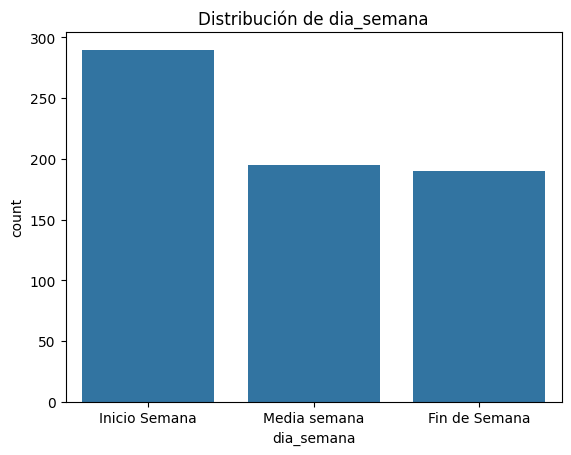

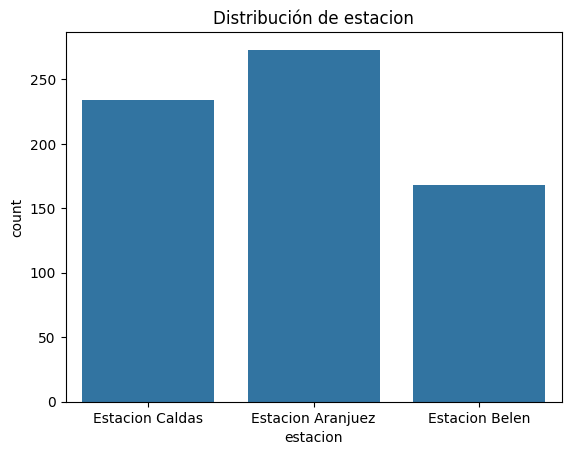

In [110]:
#Se recorre las columnas categoricas
for columna in columnasCategoricas:
    sns.countplot(x=dataSetCalidadAire[columna])
    plt.title(f"Distribución de {columna}")
    plt.show()


Visualización variables númericas

In [111]:
# Graficar las variables númericas con respecto a nuestra avriable objetivo que es pm25

# Histogramas de las variables númericas

# for columna in columnasNumericas:
#     sns.histplot(dataSetCalidadAire[columna], kde=True)
#     plt.title(f"Distribución de {columna}")
#     plt.show()

Box Plot de nuestra variable PM25

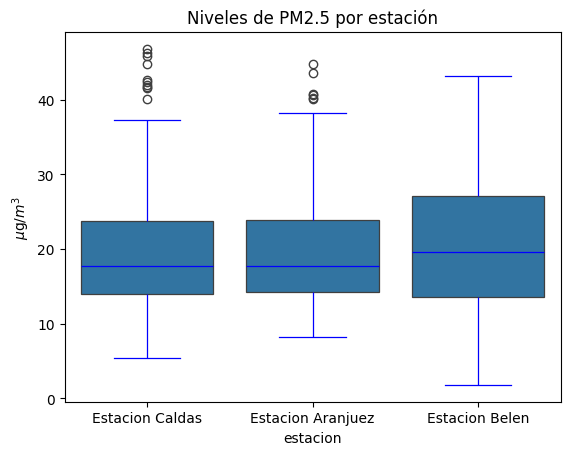

In [112]:
# Box Plot PM2.5 agrupado por estaciones
ax = sns.boxplot(x=dataSetCalidadAire['estacion'], y= dataSetCalidadAire['pm25'],  linewidth=0.9)
ax.set_title("Niveles de PM2.5 por estación")
plt.ylabel("$\mu$g/$m^3$")
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='blue')
plt.show()

### Eliminación de valores atípicos

In [113]:
#Calculo de valores atípicos

#Calculo de Q1 t Q3
Q1 = np.percentile(dataSetCalidadAire['pm25'], 25, interpolation = 'midpoint')
Q3 = np.percentile(dataSetCalidadAire['pm25'], 75, interpolation = 'midpoint')

#Cálculo del rango intercuartil
IQR = Q3 - Q1

#Cálculo de valor mínimo y máximo para los valores atípicos
valorInferior = Q1 - 1.5*IQR
valorSuperior = Q3 + 1.5*IQR

print(f'Valor atípico leve inferior:{valorInferior}')
print(f'Valor atípico leve superior:{valorSuperior}')

Valor atípico leve inferior:-2.0034375000000004
Valor atípico leve superior:41.0736625


In [114]:
limpiaDataSetCalidadAire = dataSetCalidadAire.copy()

#Se tiene en cuenta los datos que se encuentren mayores a los valores de pm25 mayores al valor inferior
# y tambien lso que se encuentren menores al valor superior

limpiaDataSetCalidadAire = limpiaDataSetCalidadAire[(limpiaDataSetCalidadAire['pm25'] > valorInferior) & (limpiaDataSetCalidadAire['pm25'] < valorSuperior)]
limpiaDataSetCalidadAire.head()

,anio,mes,dia,pm25,dia_semana,estacion,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2024,1,1,19.82980,Inicio Semana,Estacion Caldas,1,19.9,72.15,0.0,827.2,1.1,1.60,156.0,156.0
1,2024,1,2,12.33775,Inicio Semana,Estacion Caldas,0,19.6,76.10,0.0,826.3,1.6,2.60,128.0,130.5
2,2024,1,3,15.04940,Inicio Semana,Estacion Caldas,0,17.8,73.50,0.0,826.6,1.5,2.25,155.0,153.0
3,2024,1,4,17.34030,Media semana,Estacion Caldas,0,20.0,69.10,0.0,827.0,1.4,2.10,160.0,158.0
4,2024,1,5,16.80595,Media semana,Estacion Caldas,0,19.3,71.05,0.0,826.9,1.5,2.30,147.0,147.0


### Encontrar valores atipicos en las variables de entrada

In [115]:
#utilización de LocalOutlierFactor con 8 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=15 y el contaminante lo vamos a hacer con un porcentaje más 0.3
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.05)


# identificar los valores atípicos por medio de lof
y_pred = lof.fit_predict(limpiaDataSetCalidadAire[columnasNumericas])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', limpiaDataSetCalidadAire[outliers].index.tolist())
# Eliminar los valores atípicos del dataframe original
limpiaDataSetCalidadAire = limpiaDataSetCalidadAire.loc[~outliers]
limpiaDataSetCalidadAire.head(3)

Indices de valores atípicos:  [31, 32, 38, 61, 127, 172, 1, 16, 25, 28, 37, 50, 60, 82, 89, 90, 91, 94, 99, 100, 104, 105, 149, 180, 212, 238, 241, 251, 15, 113, 115, 116, 128]


,anio,mes,dia,pm25,dia_semana,estacion,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2024,1,1,19.82980,Inicio Semana,Estacion Caldas,1,19.9,72.15,0.0,827.2,1.1,1.60,156.0,156.0
1,2024,1,2,12.33775,Inicio Semana,Estacion Caldas,0,19.6,76.10,0.0,826.3,1.6,2.60,128.0,130.5
2,2024,1,3,15.04940,Inicio Semana,Estacion Caldas,0,17.8,73.50,0.0,826.6,1.5,2.25,155.0,153.0


In [116]:
#Cantidad de registros después de eliminar los valores atípicos del dataframe
print(f"DataSet sin eliminación de valores atipicos es de  : {len(dataSetCalidadAire)}")
print(f"DataSet con eliminación de valores atipicos es de  : {len(limpiaDataSetCalidadAire)}")


DataSet sin eliminación de valores atipicos es de  : 675
DataSet con eliminación de valores atipicos es de  : 627


### Realizamos proceso de estandarización de nuestro dataset

### Correlación variables con nuestra variable pm25

In [117]:
#Se crea una copia de nuestro datasetCalidad limpia sin atipicos
datosCorrelacion = limpiaDataSetCalidadAire.copy()
#Elimina variables categoricas para poder ver correlación 
columnas  = ['dia_semana', 'estacion']
datosCorrelacion = eliminarColumnas(datosCorrelacion,columnas)


Visualizamos la correlacion que tienen las caracteristicas sobre la variable de respuesta pm25

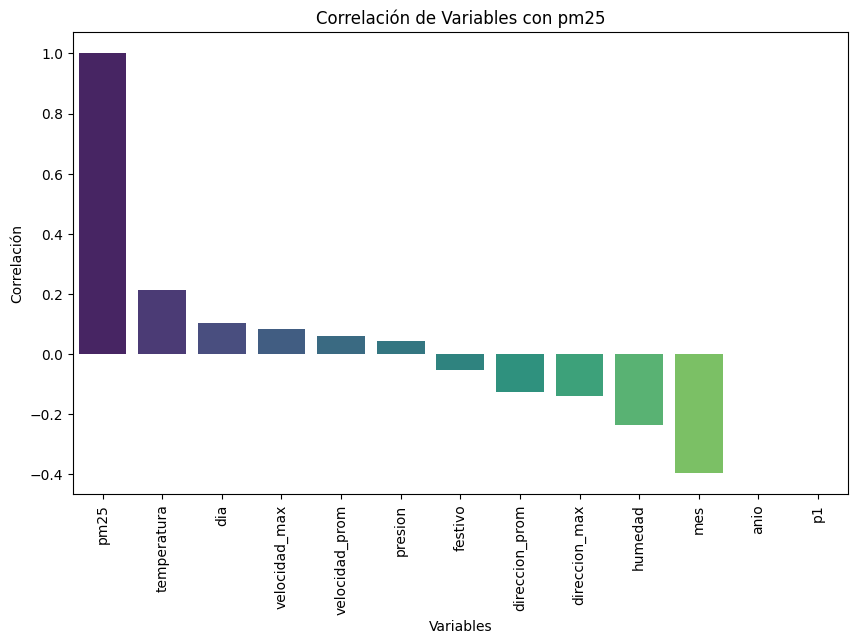

In [118]:

# Calcular la correlación de todas las variables con "pm25"
correlation = datosCorrelacion.corr()['pm25'].sort_values(ascending=False)

# Graficar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.title('Correlación de Variables con pm25')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

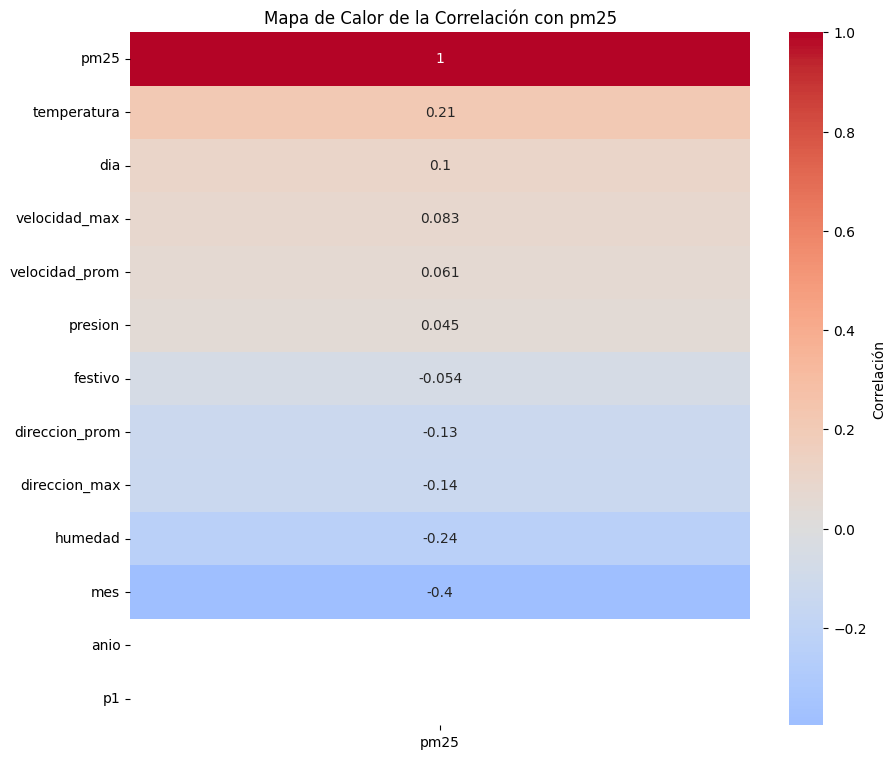

In [119]:
# Calcular la matriz de correlación
correlation_matrix = datosCorrelacion.corr()

# Filtrar para incluir solo la fila y columna de "pm25"
correlation_pm25 = correlation_matrix[['pm25']].sort_values(by='pm25', ascending=False)

# Crear el heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_pm25, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlación'})
plt.title('Mapa de Calor de la Correlación con pm25')
plt.show()

Análisis final de nuestra limpieza

In [120]:
limpiaDataSetCalidadAire.describe()

,anio,mes,dia,pm25,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max
count,627.0,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.0,627.000000,627.000000,627.000000,627.000000,627.000000
mean,2024.0,5.165869,15.934609,19.535882,0.047847,21.714242,72.630702,0.0,842.672687,1.270614,2.204067,140.870016,144.874003
std,0.0,2.629626,8.729912,7.259532,0.213613,2.308017,8.538587,0.0,12.066783,0.475305,0.770883,69.458473,66.284320
min,2024.0,1.000000,1.000000,2.383460,0.000000,16.100000,51.000000,0.0,824.100000,0.280000,0.500000,29.000000,39.000000
25%,2024.0,3.000000,8.500000,14.034075,0.000000,20.100000,65.550000,0.0,826.800000,0.910000,1.700000,82.000000,83.000000
50%,2024.0,5.000000,16.000000,17.777350,0.000000,21.900000,72.300000,0.0,850.500000,1.280000,2.100000,137.000000,147.500000
75%,2024.0,7.500000,24.000000,23.701225,0.000000,23.400000,80.050000,0.0,852.000000,1.500000,2.700000,189.000000,195.500000
max,2024.0,9.000000,31.000000,40.834800,1.000000,28.299999,91.000000,0.0,854.600000,3.500000,5.000000,345.500000,333.000000


### One Hot de nuestras variables

In [121]:
limpiaDataSetCalidadAire= pd.get_dummies(limpiaDataSetCalidadAire)
limpiaDataSetCalidadAire = limpiaDataSetCalidadAire.astype(int)
limpiaDataSetCalidadAire.head()

,anio,mes,dia,pm25,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max,dia_semana_Fin de Semana,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas
0,2024,1,1,19,1,19,72,0,827,1,1,156,156,0,1,0,0,0,1
1,2024,1,2,12,0,19,76,0,826,1,2,128,130,0,1,0,0,0,1
2,2024,1,3,15,0,17,73,0,826,1,2,155,153,0,1,0,0,0,1
3,2024,1,4,17,0,20,69,0,827,1,2,160,158,0,0,1,0,0,1
4,2024,1,5,16,0,19,71,0,826,1,2,147,147,0,0,1,0,0,1


### Archivo de nuestro dataset limpio

In [122]:
#limpiaDataSetCalidadAire.to_csv("data/stage/dataSetLimpio.csv", index=False)
#Sin Imputación
limpiaDataSetCalidadAire.to_csv("data/stage/dataSetLimpio4.csv", index=False)

### Dividimos nuestro Dataset

In [123]:
X = limpiaDataSetCalidadAire.drop(columns ='pm25')
y = limpiaDataSetCalidadAire['pm25']

In [124]:
# División de los datos
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.7, #70 % de nuestros datos en entrenamiento
    random_state=1234,
    shuffle=True
)

#Se guardan los Y test para después evaluar nuestros modelos
#y_test.to_csv("data/stage/datosYtest.csv", index=False)
y_test.to_csv("data/stage/datosYtest4.csv", index=False)


### Estandarización de nuestras variables

In [125]:
columnasModelo = X.columns.tolist()
columnasModelo 

['anio',
 'mes',
 'dia',
 'festivo',
 'temperatura',
 'humedad',
 'p1',
 'presion',
 'velocidad_prom',
 'velocidad_max',
 'direccion_prom',
 'direccion_max',
 'dia_semana_Fin de Semana',
 'dia_semana_Inicio Semana',
 'dia_semana_Media semana',
 'estacion_Estacion Aranjuez',
 'estacion_Estacion Belen',
 'estacion_Estacion Caldas']

In [126]:
# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[columnasModelo] = scaler.fit_transform(X_train[columnasModelo])
X_test[columnasModelo] = scaler.transform(X_test[columnasModelo])

X_train[columnasModelo].head(3)

,anio,mes,dia,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max,dia_semana_Fin de Semana,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas
50,0.0,0.25,0.433333,0.0,0.833333,0.307692,0.0,0.827586,0.333333,0.4,0.123810,0.111111,0.0,0.0,1.0,0.0,1.0,0.0
106,0.0,0.75,0.266667,0.0,0.750000,0.282051,0.0,0.862069,0.000000,0.2,0.387302,0.551971,0.0,1.0,0.0,0.0,1.0,0.0
258,0.0,1.00,0.500000,0.0,0.666667,0.256410,0.0,0.896552,0.333333,0.4,0.463492,0.501792,0.0,1.0,0.0,1.0,0.0,0.0


Guardamos el escalamiento para futuras entrada de nuestros modelos

In [127]:
#Con imputación
#joblib.dump(scaler, 'data/stage/estandarizacionDataSet.pkl')
# #Sin imputación
joblib.dump(scaler, 'data/stage/estandarizacionDataSet4.pkl')

['data/stage/estandarizacionDataSet4.pkl']